In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font="Yu Gothic", font_scale=1)


In [45]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("DFshape  train:", df_train.shape, "test:", df_test.shape)

DFshape  train: (207, 12) test: (40, 11)


In [121]:
df_train["datetime"] = pd.to_datetime(df_train["datetime"]) #datetime列をdatetime型に
df_test["datetime"] = pd.to_datetime(df_test["datetime"])
#df_train.head()


In [47]:
df_train.describe()

,datetime,y,soldout,kcal,payday,temperature
count,207,207.000000,207.000000,166.000000,10.0,207.000000
mean,2014-04-26 05:47:49.565217280,86.623188,0.449275,404.409639,1.0,19.252174
min,2013-11-18 00:00:00,29.000000,0.000000,315.000000,1.0,1.200000
25%,2014-02-11 00:00:00,57.000000,0.000000,386.000000,1.0,11.550000
50%,2014-04-25 00:00:00,78.000000,0.000000,408.500000,1.0,19.800000
75%,2014-07-10 12:00:00,113.000000,1.000000,426.000000,1.0,26.100000
max,2014-09-30 00:00:00,171.000000,1.000000,462.000000,1.0,34.600000
std,NaN,32.882448,0.498626,29.884641,0.0,8.611365


In [48]:
df_train["payday"]=df_train["payday"].fillna(0)
df_train["event"] = df_train["event"].fillna("なし")
df_train["remarks"] = df_train["remarks"].fillna("なし")

df_train["precipitation"] = df_train["precipitation"].apply(lambda x : -1 if x == "--" else float(x))
df_train["month"] = df_train["datetime"].dt.month

<Axes: xlabel='datetime'>

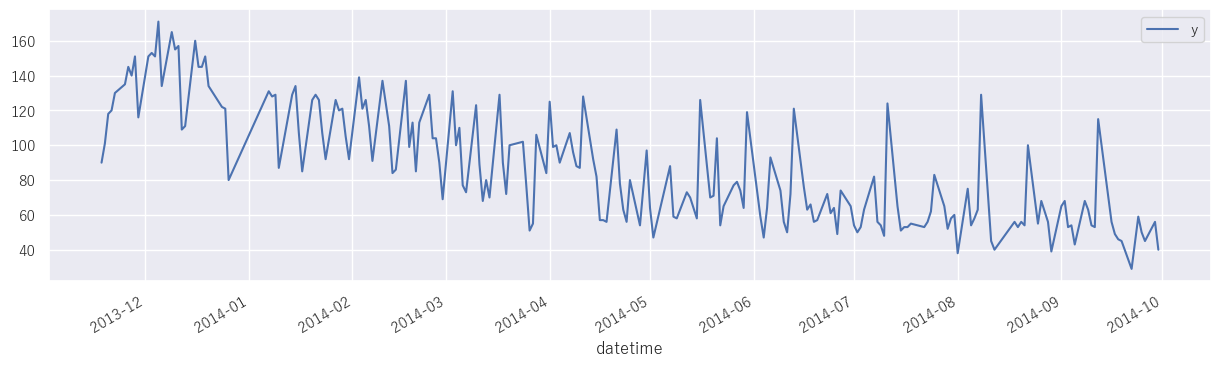

In [55]:
df_train.plot(x="datetime",y="y", figsize=(15,4))

日数が経過するごとに売り上げが減少している。
後半の時期でもスパイクしているため、売上に寄与する要因がある可能性がある。

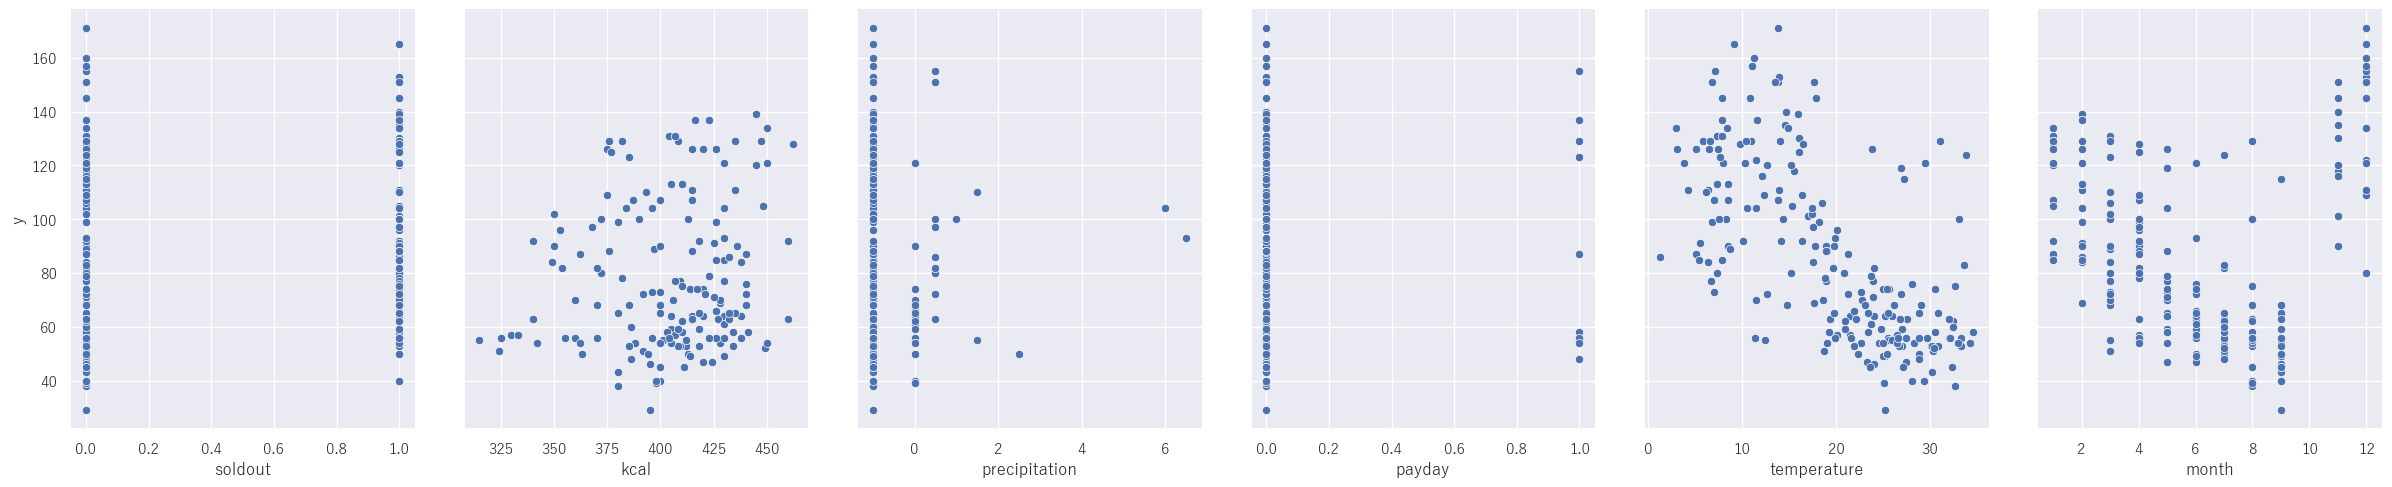

In [81]:
pg_scat_train = sns.PairGrid(data=df_train, 
             y_vars=["y"], x_vars=["soldout","kcal","precipitation","payday","temperature","month"])
# 全体のサイズを変更
pg_scat_train.figure.set_size_inches(25, 6)
pg_scat_train.map(sns.scatterplot)
plt.show()

上の図より、相関がありそうなのは気温と月だが、日数が経過するごとに売り上げが減少している性質があるためどちらも代替変数である可能性が高い。

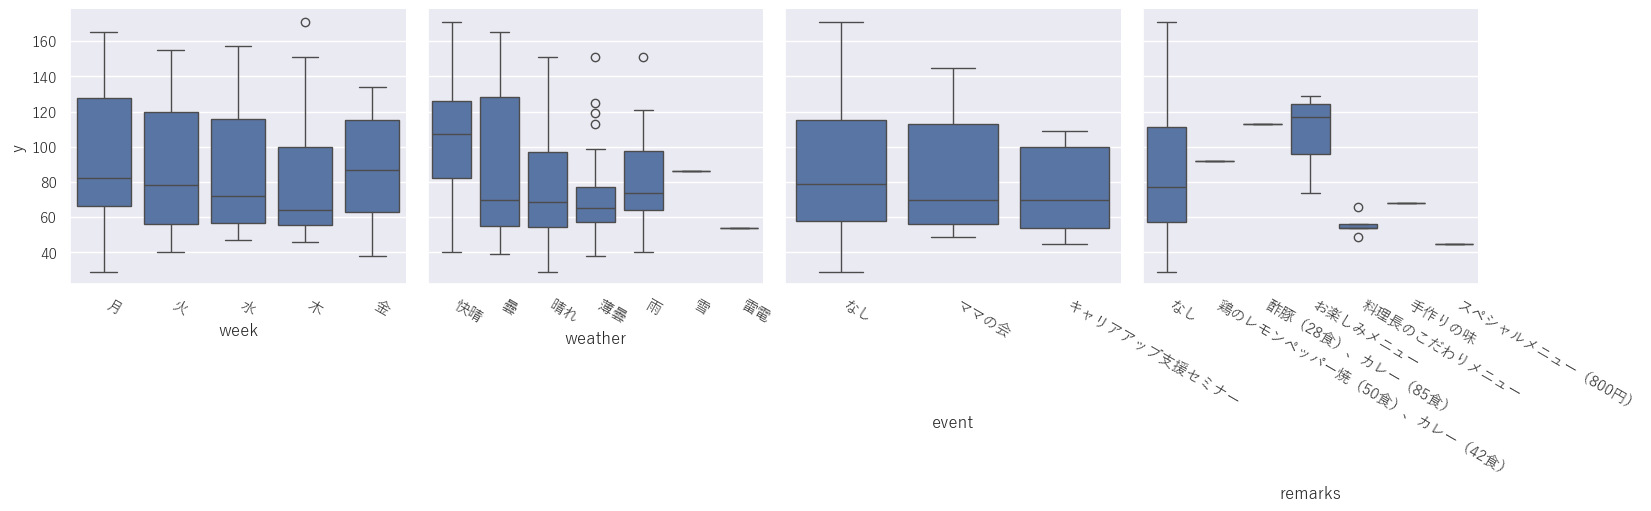

In [ ]:
pg_box_train = sns.PairGrid(data=df_train, 
             y_vars=["y"], x_vars=["week","weather","event","remarks"],
             aspect=2)
pg_box_train.figure.set_size_inches(15, 5)
pg_box_train.map(sns.boxplot)
#ChatGPT
# ラベル回転
for ax_row in pg_box_train.axes:
    for ax in ax_row:
        ticks = range(len(ax.get_xticks()))  # 目盛り位置を取得して固定
        ax.set_xticks(ticks)
        labels = [label.get_text() for label in ax.get_xticklabels()]  # 現在のラベルを取得
        ax.set_xticklabels(labels, rotation=330, ha="left")  # ラベルを回転
# レイアウト調整
pg_box_train.figure.subplots_adjust(bottom=0.4, top=0.95)

plt.show()

<Axes: xlabel='datetime'>

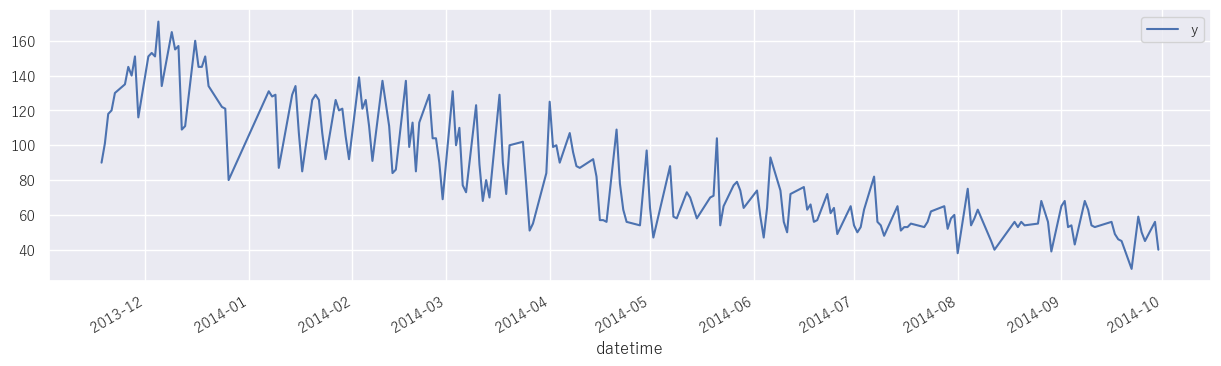

In [153]:
df_train[df_train["remarks"]!="お楽しみメニュー"].plot(x="datetime", y="y",figsize=(15,4))

<Axes: xlabel='fun', ylabel='y'>

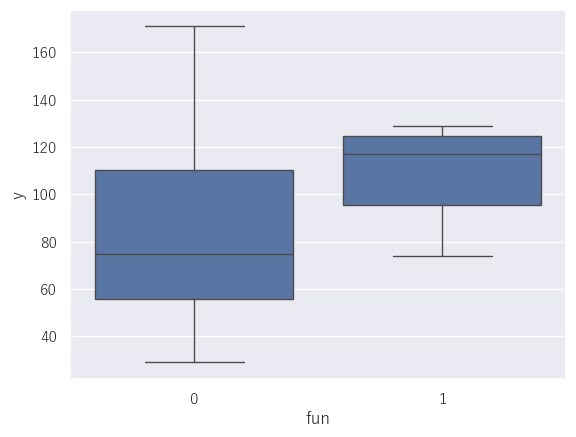

In [155]:
df_train["fun"] = df_train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
sns.boxplot(x="fun",y="y",data=df_train)

お楽しみメニューを除いた場合に、後半の売り上げ数のスパイクが減少=スパイクの原因はお楽しみメニューであるかもしれない
お楽しみメニューがあるかないかで比較しても、中央値検定によれば有意に差がある

<Axes: >

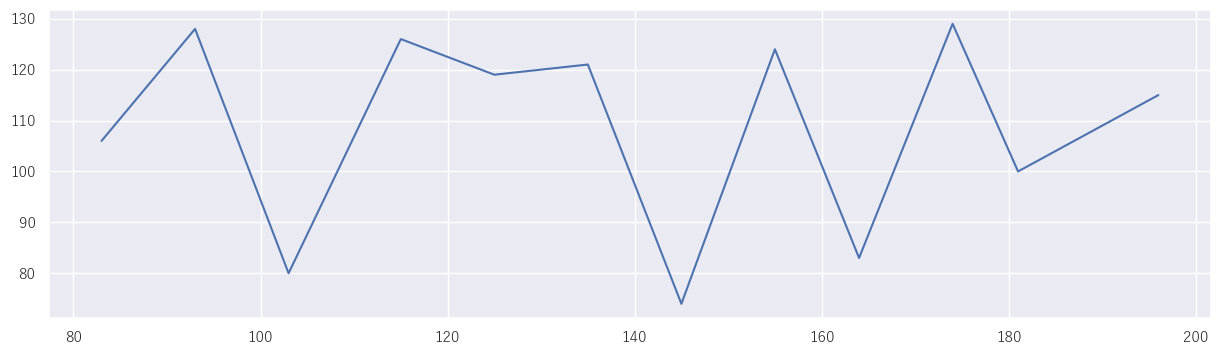

In [156]:
df_train[df_train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [163]:
df_train[df_train["remarks"]=="お楽しみメニュー"].head()#.shape

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,fun,curry
83,2014-03-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,18.5,3,1,1
93,2014-04-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,16.5,4,1,1
103,2014-04-25,80,金,0,中華丼,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,20.8,4,1,0
115,2014-05-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,快晴,-1.0,23.8,5,1,1
125,2014-05-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,なし,0.0,薄曇,-1.0,26.9,5,1,1


<Axes: xlabel='curry', ylabel='y'>

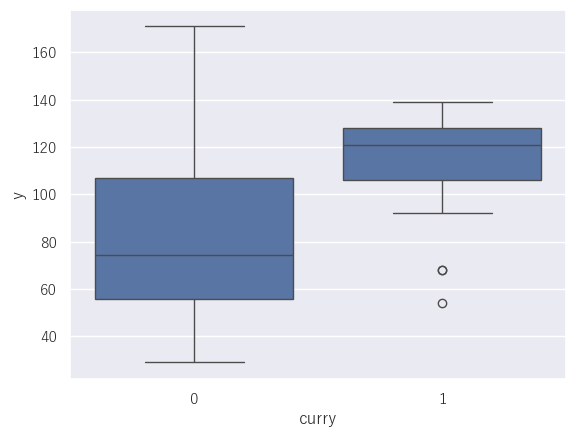

In [158]:
df_train["curry"] = df_train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
sns.boxplot(x="curry",y="y",data=df_train)

In [168]:
#データの前処理
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train["t"] = 1
test["t"] = 0
dat = pd.concat([train,test],sort=True).reset_index(drop=True)
print("行数と列数", dat.shape)         
print("データ型や欠損値の有無", dat.info())         
print("数値データの基本統計量", dat.describe())    

行数と列数 (247, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       247 non-null    object 
 1   event          17 non-null     object 
 2   kcal           202 non-null    float64
 3   name           247 non-null    object 
 4   payday         12 non-null     float64
 5   precipitation  247 non-null    object 
 6   remarks        28 non-null     object 
 7   soldout        247 non-null    int64  
 8   t              247 non-null    int64  
 9   temperature    247 non-null    float64
 10  weather        247 non-null    object 
 11  week           247 non-null    object 
 12  y              207 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 25.2+ KB
データ型や欠損値の有無 None
数値データの基本統計量              kcal  payday     soldout           t  temperature           y
count  202.000000    12.0  247.000000  247.000000   

TRAIN: 7.567045890582926 VARIDATE 12.108512732864117
TRAIN: 7.898879809389376 VARIDATE 10.596024908707413
TRAIN: 8.257827724786777 VARIDATE 8.842687980106906
TRAIN: 7.954599685874008 VARIDATE 19.93205551309561
TRAIN: 7.913918883780418 VARIDATE 9.443466823946043
AVG
7.918454398882702 12.184549591744016
RMSE 7.986229908417227


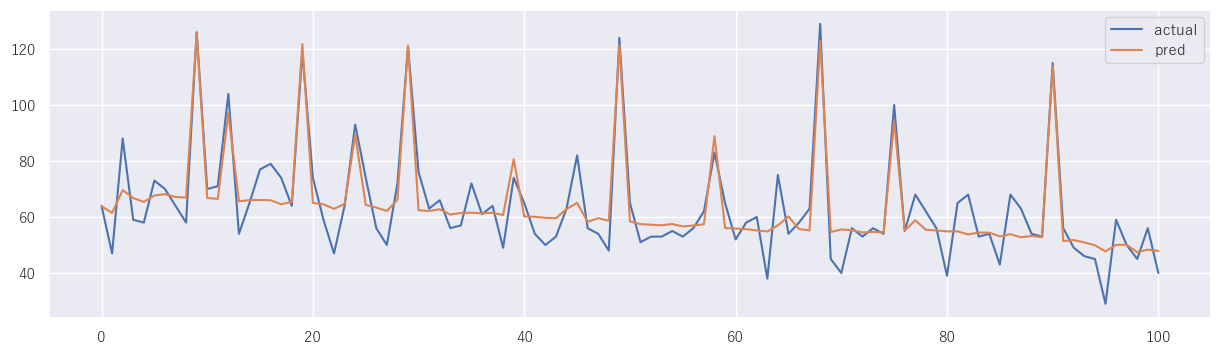

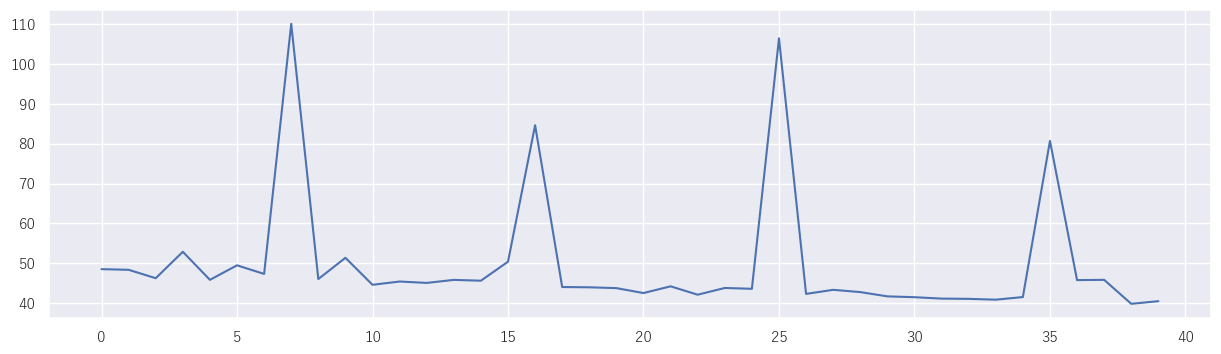

In [173]:
#後で

###モデル作成
train["t"] = 1
test["t"] = 0
dat = pd.concat([train,test],sort=True).reset_index(drop=True)
dat.index = pd.to_datetime(dat["datetime"])
dat = dat["2014-05-01":]
dat = dat.reset_index(drop=True)

dat["days"] = dat.index
dat["precipitation"] = dat["precipitation"].apply(lambda x : -1 if x=="--" else x).astype(np.float64)
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

cols = ["precipitation","weather","days","fun","curry","y"]
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
def learning(trainX,y_train):
    model1 = LR()
    model2 = RF(n_estimators=100,max_depth=4,random_state=777)
    model1.fit(trainX["days"].values.reshape(-1,1),y_train)
    pred = model1.predict(trainX["days"].values.reshape(-1,1))
    
    pred_sub = y_train - pred
    model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")],pred_sub)
    return model1, model2

###評価
kf = KFold(n_splits=5)
tr = dat[dat["t"]==1][cols]

trains = []
tests = []
for train_index, test_index in kf.split(tr):
    tr.loc[train_index,"tt"] = 1
    tr.loc[test_index,"tt"] = 0
    tr["tt"] = tr["tt"].astype(np.int64)
    tmp = pd.get_dummies(tr)
    
    trainX = tmp[tmp["tt"]==1]
    del trainX["tt"]
    testX = tmp[tmp["tt"]==0]
    del testX["tt"]
    y_train = tmp[tmp["tt"]==1]["y"]
    y_test = tmp[tmp["tt"]==0]["y"]
    
    model1, model2 = learning(trainX, y_train)
    
    pred_train = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:, ~trainX.columns.str.match("y")])
    pred_test = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:, ~testX.columns.str.match("y")])
    
    print("TRAIN:",MSE(y_train,pred_train)**0.5, "VARIDATE",MSE(y_test, pred_test)**0.5)
    trains.append(MSE(y_train,pred_train)**0.5)
    tests.append(MSE(y_test, pred_test)**0.5)
print("AVG")
print(np.array(trains).mean(), np.array(tests).mean())

###
cols = ["precipitation","weather","days","fun","curry","y","t"]
tmp = pd.get_dummies(dat[cols])
trainX = tmp[tmp["t"]==1]
del trainX["t"]
testX = tmp[tmp["t"]==0]
del testX["t"]
y_train = tmp[tmp["t"]==1]["y"]
y_test = tmp[tmp["t"]==0]["y"]
model1, model2 = learning(trainX,y_train)
pred = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:,~trainX.columns.str.match("y")])

p = pd.DataFrame({"actual":y_train,"pred":pred})
p.plot(figsize=(15,4))
print("RMSE",MSE(y_train,pred)**0.5)

###
model1, model2 = learning(trainX,y_train)
pred = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:,~testX.columns.str.match("y")])
plt.figure(figsize=(15,4))
plt.plot(pred)

###

In [176]:
sample = pd.read_csv("sample.csv",header=None)
sample[1] = pred
sample.to_csv("submit01.csv",index=None,header=None)

In [ ]:
"""#勾配ブースティング
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(min_samples_leaf=3)
model.fit(X_train, y_train)"""